#Imports

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

train = pd.read_parquet('processed_train.parquet')
test = pd.read_parquet('test.parquet')


1. traintestsplit для валидации
+ еще надо на фолды бить
2. подбор гиперпараметров
3. Надо ли тест менять под трейн?
4. модельки: КНН, лес, логрег = вероятности

In [ ]:
train.describe()

,"('average_values',)","('moda_values',)","('median_values',)","('variance_values',)","('std_values',)","('average_days',)","('moda_days',)","('median_days',)","('variance_days',)","('std_days',)","('label',)"
count,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000,110492.000000
mean,0.776990,0.455403,0.515910,0.469685,0.536357,0.293241,0.103652,0.292771,0.394177,0.478209,0.500000
std,0.090396,0.091140,0.101452,0.191232,0.185307,0.209105,0.196546,0.209145,0.255294,0.251190,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.725815,0.394523,0.446620,0.319058,0.393280,0.119588,0.000000,0.118929,0.182574,0.271784,0.000000
50%,0.788846,0.446247,0.514579,0.458197,0.535568,0.260904,0.000000,0.260714,0.329917,0.441036,0.500000
75%,0.832545,0.514199,0.582538,0.602290,0.670963,0.413066,0.115044,0.412143,0.560359,0.661315,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = train.columns

In [ ]:
train.rename(columns = {cols[0]:"average_values", cols[1]:"moda_values", cols[2]:"median_values", cols[3]:"variance_values", cols[4]:"std_values",
                        cols[5]: "average_days", cols[6]: "moda_days", cols[7]: "median_days", cols[8]: "variance_days", cols[9]: "std_days",
                        cols[10]: "label"}, inplace = True)

#Train/validation split

In [ ]:
X = train.drop(columns = ['label'])
y = train['label']

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.3,
                                                  stratify = y,
                                                  random_state = 42)

print('Train: ', X_train.shape)
print('Valudation: ', X_val.shape)

Train:  (77344, 10)
Valudation:  (33148, 10)


# default hyperparams, all models

In [ ]:
classifiers = {
    "lr": LogisticRegression(),
    "svc": SVC(),
    "knn": KNeighborsClassifier(),
    "dtree": DecisionTreeClassifier(),
    "bagging": BaggingClassifier(),
    "rfc": RandomForestClassifier(),
    "extra_trees": ExtraTreesClassifier(),
    "adaboost": AdaBoostClassifier(),
    "gb": GradientBoostingClassifier(),
    "hgb": HistGradientBoostingClassifier(),
    "nb": GaussianNB(),
    "nn": MLPClassifier(),
}

In [ ]:
def evaluate_model(y_true, y_pred):
    all_metrics = {
        "acc": metrics.accuracy_score(y_true, y_pred),
        "precision": metrics.precision_score(y_true, y_pred),
        "recall": metrics.recall_score(y_true, y_pred),
        "f1": metrics.f1_score(y_true, y_pred),
        "roc_auc" : metrics.roc_auc_score(y_true, y_pred)
    }
    return all_metrics

In [ ]:
model_performances = []
performances=[]
for label, model in tqdm(classifiers.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    perf = evaluate_model(y_val, y_pred)
    performances.append(perf)


 58%|█████▊    | 7/12 [04:09<01:44, 20.87s/it]/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|██████████| 12/12 [06:34<00:00, 32.87s/it]


In [ ]:
labels = classifiers.keys()
perform = pd.DataFrame(performances)

dict_keys(['lr', 'svc', 'knn', 'dtree', 'bagging', 'rfc', 'extra_trees', 'adaboost', 'gb', 'hgb', 'nb', 'nn'])

In [ ]:
perform['name'] = labels
perform

,acc,precision,recall,f1,roc_auc,name
0,0.731236,0.741326,0.710329,0.725497,0.731236,lr
1,0.742669,0.737595,0.753349,0.745388,0.742669,svc
2,0.740588,0.721589,0.783456,0.751251,0.740588,knn
3,0.840322,0.797166,0.912936,0.851132,0.840322,dtree
4,0.872964,0.851721,0.903162,0.876687,0.872964,bagging
5,0.881079,0.845817,0.932062,0.886848,0.881079,rfc
6,0.894262,0.880998,0.911669,0.896071,0.894262,extra_trees
7,0.739833,0.724045,0.775069,0.748689,0.739833,adaboost
8,0.750211,0.738114,0.775612,0.756399,0.750211,gb
9,0.756758,0.749107,0.772113,0.760436,0.756758,hgb


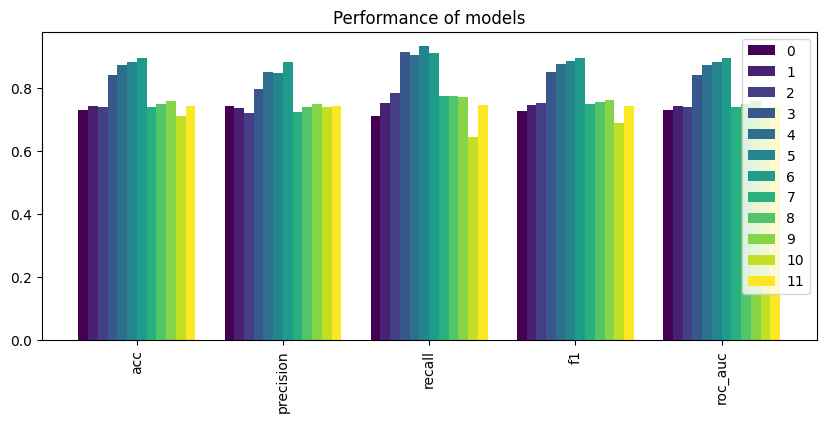

In [ ]:
fig, ax = plt.subplots()
perform.drop(columns = ['name']).T.plot(
    kind="bar",
    title="Performance of models",
    colormap=plt.cm.viridis,
    width=0.8,
    figsize=(10, 4),
    ax=ax
)
plt.show()

So, best performance gets the ExtraTtreesClassifier

#grid_search

In [ ]:
param_grid = {
    'n_estimators': [75, 100, 125],
    'max_depth': [45, 90, None],
    'max_leaf_nodes': [45, 90, None],
    'bootstrap': [True, None]
}

In [ ]:
grid_search = GridSearchCV(ExtraTreesClassifier(),
						param_grid=param_grid,scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

{'mean_fit_time': array([8.40809631e-01, 1.15597496e+00, 1.38696303e+00, 9.53129148e-01,
       1.25283399e+00, 1.59488931e+00, 3.07658057e+00, 4.06137915e+00,
       5.08726182e+00, 8.32203150e-01, 1.13873377e+00, 1.39459929e+00,
       9.67815256e-01, 1.24508204e+00, 1.57281866e+00, 3.02792249e+00,
       4.02427163e+00, 5.04355693e+00, 8.48517227e-01, 1.13730516e+00,
       1.39652567e+00, 9.49812174e-01, 1.25847521e+00, 1.59562297e+00,
       3.02848811e+00, 4.03946710e+00, 5.15790248e+00, 2.71930695e-03,
       2.32300758e-03, 2.28514671e-03, 2.29372978e-03, 2.28309631e-03,
       2.27527618e-03, 2.24881172e-03, 2.22883224e-03, 2.21490860e-03,
       2.22916603e-03, 2.21433640e-03, 2.21977234e-03, 2.25076675e-03,
       2.25844383e-03, 2.21519470e-03, 2.23450661e-03, 2.20308304e-03,
       2.23155022e-03, 2.24752426e-03, 2.20732689e-03, 2.19149590e-03,
       2.25033760e-03, 2.28986740e-03, 2.26354599e-03, 2.43401527e-03,
       2.28052139e-03, 2.25448608e-03]), 'std_fit_time': ar

In [ ]:
print(grid_search.best_estimator_)

ExtraTreesClassifier(bootstrap=True, max_depth=45, n_estimators=125)


Was chosen Classifier with default hyperparams because of its higher roc auc score

#ExtraTrees

In [ ]:
model_rfc =  ExtraTreesClassifier(criterion = 'gini', n_estimators = 150, bootstrap = True)
model_rfc.fit(X_train, y_train) # обучение
y_pred = model_rfc.predict(X_val) # предсказание

print ("AUC-ROC (test) = ", metrics.roc_auc_score(y_val, y_pred))

AUC-ROC (test) =  0.8826475202123808


In [ ]:
probs = model_rfc.predict_proba(X_val)
probs

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.94, 0.06],
       ...,
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.87, 0.13]])

# Loading model

In [ ]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(model_rfc, 'model.pkl')

['model.pkl']